**Each phase of the process:**
1. [Business understanding](#Businessunderstanding)
    1. [What Questions Are We Trying to Answer?](#QA)
        1. [What are the Desired Outputs](#Desiredoutputs)
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)

## 1.1 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

In this project - we are using datasets from Kaggle - HEART DISEASE ANALYSIS and applying several ML Models, such as KNN, Linear Regression, Decision Tree, for  predicting heart illness of patients by the characteristics provided by the data set. However, we aren't looking for the best algorithm, but to see how each of them performs.

# Point out all library that we are using here.


 - Seaborn
 - Scikit-Learn

In [1]:
# Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV


# Setting Configs
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('fivethirtyeight')


# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## Dataset Description 

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.**

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


## Attribute Information

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

## 2.1 Describe Data <a class="anchor" id="Describedata"></a>

In [2]:
# Loading Dataset
heart = pd.read_csv('./datasets/heart.csv')

# Inspecting Dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0


In [3]:
# Dataset info
print('#' * 50)
print('Total Rows:', heart.shape[0])
print('Total Columns:', heart.shape[1])
print('#' * 50, '\n')
heart.info(memory_usage=False)
print('\n')
print('#' * 50)

##################################################
Total Rows: 1025
Total Columns: 14
################################################## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

##################################################


In [4]:
#Descriptive Statistics
print('#' * 64)
print('Descriptive Statistics')
print('#' * 64)
heart.select_dtypes(exclude='object').describe()

################################################################
Descriptive Statistics
################################################################


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,0.696,0.942,131.612,246.000,0.149,0.530,149.114,0.337,1.072,1.385,0.754,2.324,0.513
std,9.072,0.460,1.030,17.517,51.593,0.357,0.528,23.006,0.473,1.175,0.618,1.031,0.621,0.500
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,0.000,120.000,211.000,0.000,0.000,132.000,0.000,0.000,1.000,0.000,2.000,0.000
50%,56.000,1.000,1.000,130.000,240.000,0.000,1.000,152.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,275.000,0.000,1.000,166.000,1.000,1.800,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>

In [5]:
# Dataset info
print('#' * 35)
print('Checking NULL Values ')
print('#' * 35)
print(heart.isna().sum())
print('#' * 35,)

###################################
Checking NULL Values 
###################################
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
###################################


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>

At this point, we may also want to remove outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values. For this project, we will remove anomalies based on the definition of extreme outliers:

https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

- Below the first quartile − 3 ∗ interquartile range
- Above the third quartile + 3 ∗ interquartile range



**We didn't found any outliers in our dataset, or odd figures that could affect our analysis.**

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

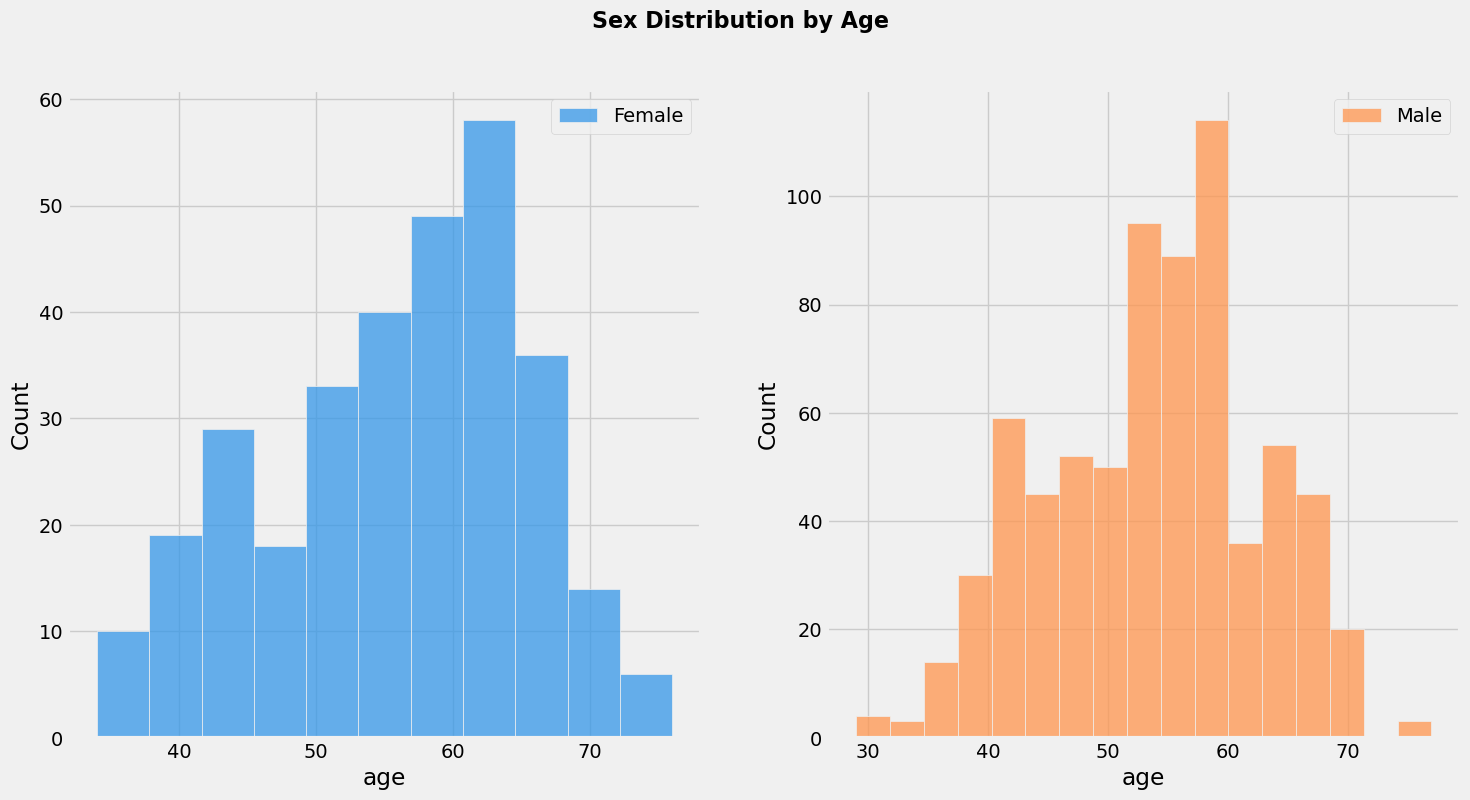

In [8]:
plt.figure(figsize=(16, 8))
plt.suptitle('Sex Distribution by Age', 
             fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif'
            )
plt.subplot(1, 2, 1)
sns.histplot(data=heart[heart.sex == 0], x=heart.age[heart.sex == 0], color='#3597e8',label ='Female')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data=heart[heart.sex == 1], x=heart.age[heart.sex == 1], color='#ff964f', label='Male')
plt.legend()
plt.show()

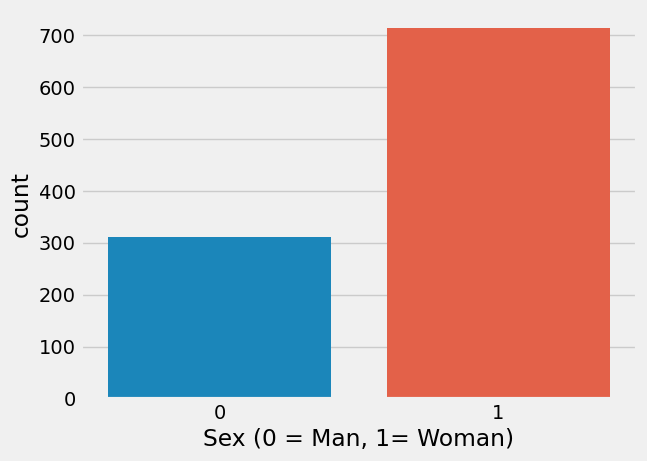

In [10]:
sns.countplot(x='sex', data=heart)
plt.xlabel("Sex (0 = Man, 1= Woman)")
plt.show()

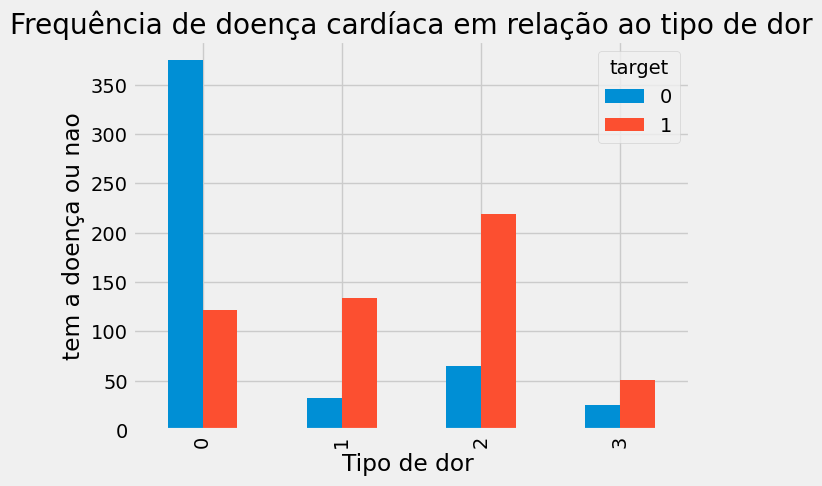

In [12]:
pd.crosstab(heart.cp, heart.target).plot(kind='bar')
plt.title("Frequência de doença cardíaca em relação ao tipo de dor")
plt.xlabel("Tipo de dor ")
plt.ylabel("tem a doença ou nao");

<AxesSubplot:ylabel='Frequency'>

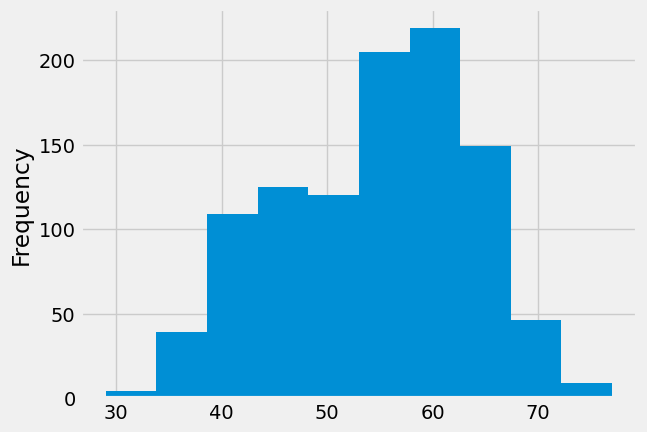

In [13]:
heart['age'].plot.hist()

<AxesSubplot:>

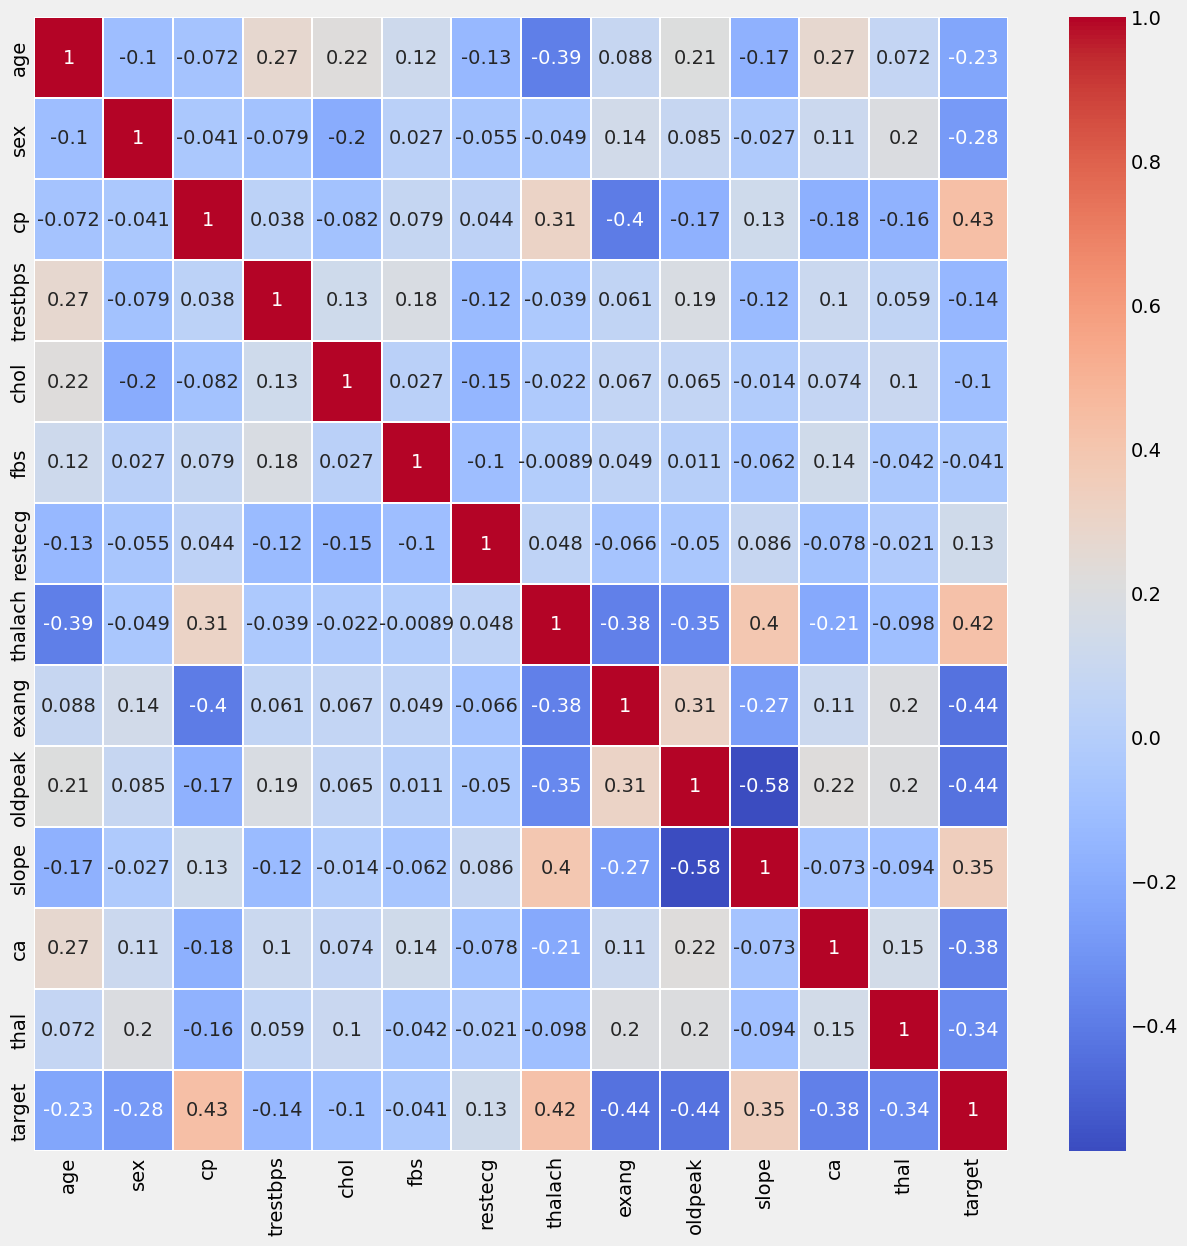

In [14]:
plt.figure(figsize=(14,14))
sns.heatmap(heart.corr(), annot = True, linewidth = 0.1, cmap='coolwarm')

In [ ]:
print('#' * 35)
print('Fixing Data Type')
print('#' * 35)
fix_dtype          = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
heart[fix_dtype]   = heart[fix_dtype].astype(object)
print(heart[fix_dtype].dtypes)
print('#' * 35)

# We need to add more EDA before starting to applying ML Models

# ML part

In [ ]:
# One-Hot Enconding

df = pd.get_dummies(heart, columns=['cp', 'thal', 'slope'], drop_first=True)

# Inspecting new dataset
df.head()

In [ ]:
# Divide dataset in 2: Dependent (Target) variable and Independent Variables
X = df.loc[:, df.columns != 'target'].values

y = df.target.values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
print(X.shape, y.shape)

# Logistic Regression

In [ ]:
# Build the steps
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]
         
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
	# Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [ ]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Linear Regression

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

In [ ]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg ,X, y, cv=kf)

# Print scores
print(cv_scores)

In [ ]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

In [ ]:
# Calculate roc_auc_score
#print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))


# Ridge

In [ ]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

In [ ]:
# Instantiate a ridge model
ridge = Ridge(alpha=.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

# Lasso

In [ ]:
# Set up the parameter grid
param_grid = {"alpha": np.linspace(.00001, 1, 20)}

lasso = Lasso()

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

# KNN Final

# Decision Tree

# Linear Regression

# Messing around

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=1984, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Test set perfomance

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {:.2f}% ".format(name, test_score * 100))

In [ ]:
for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("Model {} \n".format(name))
  print("Test Set RMSE: {} \n".format(test_rmse))
  print("Classification Report: \n {}".format(classification_report(y_test, y_pred)))


In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train_scaled, y_train)
y_pred = tuning.predict(X_test_scaled)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

In [ ]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)